In [37]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LassoCV
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

SEED = 0

In [20]:
df_review_normalised = pd.read_csv("review_phone_normalised.csv")
df_review_normalised = df_review_normalised.dropna()

C:\Users\mikec\AppData\Local\Temp\ipykernel_14048\3719648778.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review_normalised = pd.read_csv("review_phone_normalised.csv")


In [21]:
IS: pd.DataFrame
OS: pd.DataFrame
IS, OOS = train_test_split(
    df_review_normalised,
    test_size=0.2,
    random_state=SEED,
)

In [26]:
df_review_normalised_subset = IS.sample(
    n=int(5e4),
    random_state=SEED,
)
df_review_normalised_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 340581 to 1356977
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     50000 non-null  float64
 1   verified    50000 non-null  bool   
 2   reviewTime  50000 non-null  object 
 3   asin        50000 non-null  object 
 4   reviewText  50000 non-null  object 
 5   vote        50000 non-null  object 
 6   image       50000 non-null  bool   
 7   Year        50000 non-null  int64  
 8   price       50000 non-null  float64
 9   main_cat    50000 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 3.5+ MB


In [27]:
df_review_normalised_subset

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
340581,1.0,True,2015-07-16,B007B5ZNV8,horrible work ok reason start hiss completely ...,2.0,False,2015,2.54,Cell Phones & Accessories
433799,1.0,True,2016-04-10,B0098FK9KY,terrible tape constantly try turn stop interru...,2,False,2016,1.96,Cell Phones & Accessories
225662,1.0,True,2016-04-23,B004V3KCIM,utterly useless way firm conform shape dashboa...,2.0,False,2016,17.50,Cell Phones & Accessories
1298204,5.0,True,2016-07-04,B00TH3SQOI,live review buy daughter love boost feature,3,False,2016,80.00,Cell Phones & Accessories
631595,5.0,False,2013-10-06,B00D7HPDXM,div block section spacing small spacing mini v...,18.0,False,2013,7.48,Cell Phones & Accessories
...,...,...,...,...,...,...,...,...,...,...
1579259,4.0,True,2013-07-06,B013XQMPSM,system work sensor radio place correctly false...,6.0,False,2013,3.69,Cell Phones & Accessories
485705,1.0,True,2013-06-02,B00AFGP5MM,work completely stationary plan walk forget gr...,2,False,2013,7.43,Cell Phones & Accessories
1650342,2.0,True,2016-08-18,B01669UNR8,fault alarm,3,False,2016,432.18,Cell Phones & Accessories
864786,4.0,False,2015-03-14,B00IOZ6PKM,kenwood excelon instal old purchase unit want ...,9,False,2015,30.01,Cell Phones & Accessories


In [28]:
df_only_one_and_five = df_review_normalised_subset[
    (df_review_normalised_subset["overall"] == 1.0)
    | (df_review_normalised_subset["overall"] == 5.0)
]
df_only_one_and_five

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
340581,1.0,True,2015-07-16,B007B5ZNV8,horrible work ok reason start hiss completely ...,2.0,False,2015,2.54,Cell Phones & Accessories
433799,1.0,True,2016-04-10,B0098FK9KY,terrible tape constantly try turn stop interru...,2,False,2016,1.96,Cell Phones & Accessories
225662,1.0,True,2016-04-23,B004V3KCIM,utterly useless way firm conform shape dashboa...,2.0,False,2016,17.50,Cell Phones & Accessories
1298204,5.0,True,2016-07-04,B00TH3SQOI,live review buy daughter love boost feature,3,False,2016,80.00,Cell Phones & Accessories
631595,5.0,False,2013-10-06,B00D7HPDXM,div block section spacing small spacing mini v...,18.0,False,2013,7.48,Cell Phones & Accessories
...,...,...,...,...,...,...,...,...,...,...
915941,1.0,True,2015-02-12,B00JUF4JO4,receive mail wait plug get try multiple item c...,38.0,False,2015,8.63,Cell Phones & Accessories
216144,5.0,True,2011-09-04,B004L9HP6S,nail difficult text quickly accurately stylus ...,4.0,False,2011,8.99,Cell Phones & Accessories
868622,5.0,True,2017-04-07,B00IVEHE5Q,amazing instrument cyclist enter course guide ...,4,False,2017,27.24,Cell Phones & Accessories
485705,1.0,True,2013-06-02,B00AFGP5MM,work completely stationary plan walk forget gr...,2,False,2013,7.43,Cell Phones & Accessories


<Axes: xlabel='overall'>

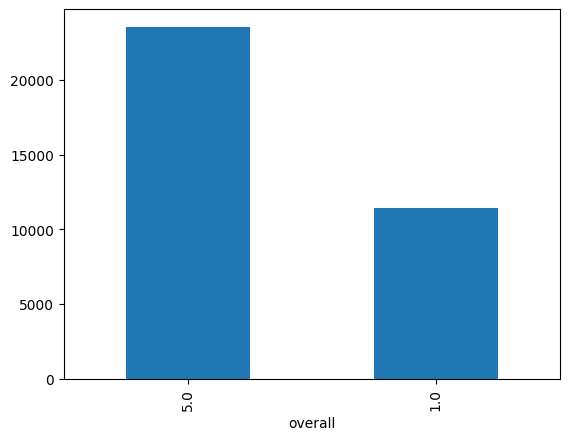

In [29]:
df_only_one_and_five["overall"].value_counts().plot.bar()

In [30]:
# Lasso CV
vectorizer = CountVectorizer(min_df=1)
undersampler = RandomUnderSampler()
lasso_cv = LassoCV(
    cv=5,
    random_state=SEED,
    alphas=[0.001, 0.01, 0.1, 1, 10, 100],
    n_jobs=-1,
)
pipeline = make_pipeline(vectorizer, undersampler, lasso_cv)

X_train, X_test, y_train, y_test = train_test_split(
    df_only_one_and_five["reviewText"],
    df_only_one_and_five["overall"],
    test_size=0.25,
    random_state=SEED,
)
pipeline.fit(X_train, y_train)
vectorizer_step = pipeline.named_steps["countvectorizer"]

X_train_dfm = vectorizer_step.transform(X_train)
X_train_dense = X_train_dfm.todense()
feature_names = vectorizer_step.get_feature_names_out()
X_train_dfm_df = pd.DataFrame(X_train_dense, columns=feature_names)

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
best_alpha = pipeline.named_steps["lassocv"].alpha_
print(f"Best alpha: {best_alpha}")

Mean Squared Error: 2.302178004509675
Best alpha: 0.001


<Axes: xlabel='overall'>

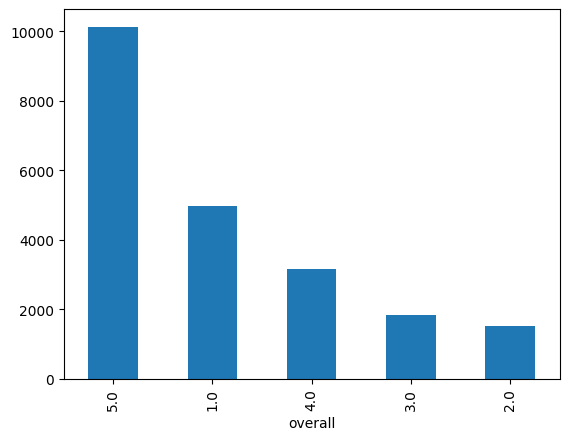

In [32]:
OOS["overall"].value_counts().plot.bar()

In [36]:
results = []
for i in range(1, 6):
    df_given_score = OOS[(OOS["overall"] == float(i))]
    y_pred: np.ndarray = pipeline.predict(df_given_score["reviewText"])
    results.append([i, y_pred.mean(), y_pred.std()])
results = pd.DataFrame(results, columns=["Score", "Mean", "Std"])
results

,Score,Mean,Std
0,1,2.038097,0.984549
1,2,2.396502,1.090186
2,3,2.846992,1.120985
3,4,3.578728,1.272291
4,5,3.974219,1.168406


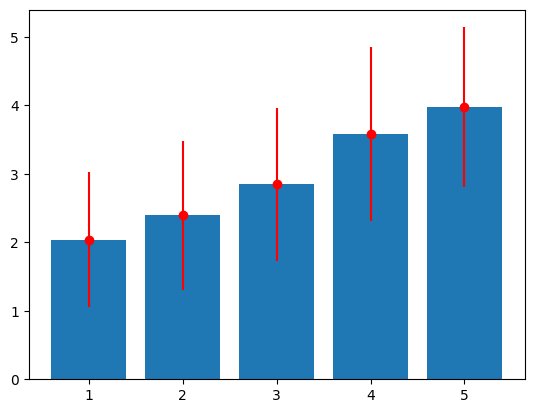

In [41]:
plt.bar(
    list(range(1, 6)),
    results["Mean"],
)
plt.errorbar(
    list(range(1, 6)),
    results["Mean"],
    yerr=results["Std"],
    fmt="o",
    color="r",
)
plt.show()

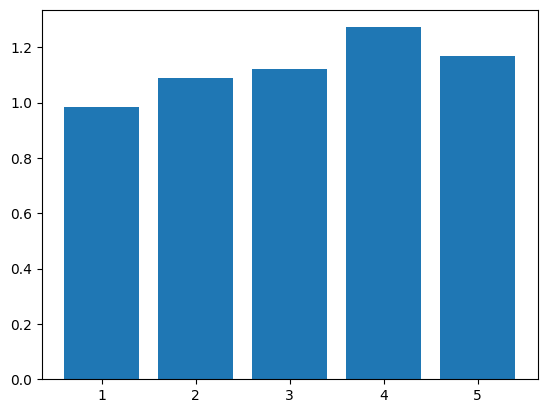

In [42]:
plt.bar(
    list(range(1, 6)),
    results["Std"],
)
plt.show()